In [1]:

# read the file
file = open("/home/neo/Robotics/ros2_ws/Logs/logdijkstra.txt", "r")
lines = file.readlines()
file.close()
#process the files and put the results in a list 
data_dijkstra = []
for line in lines:
    # check for line with "Time taken to plan the path: 0.000219" and get the time taken
    if "Time taken to plan the path:" in line:
        time = line.split(":")[1].strip()
        data_dijkstra.append(time)

# read the file
file = open("/home/neo/Robotics/ros2_ws/Logs/logastar.txt", "r")
lines = file.readlines()
file.close()

data_a_star = []
for line in lines:
    # check for line with "Time taken to plan the path: 0.000219" and get the time taken
    if "Time taken to plan the path:" in line:
        time = line.split(":")[1].strip()
        data_a_star.append(time)


# read the file for bidirectional a star
file = open("/home/neo/Robotics/ros2_ws/Logs/logbidias.txt", "r")
lines = file.readlines()
file.close()

data_bidirectional_a_star = []
for line in lines:
    # check for line with "Time taken to plan the path: 0.000219" and get the time taken
    if "Time taken to plan the path:" in line:
        time = line.split(":")[1].strip()
        data_bidirectional_a_star.append(time)

In [40]:
# prune the results 
print("Dijkstra")
print(len(data_dijkstra))
print("A*")
print(len(data_a_star))
print("Bidirectional A*")
print(len(data_bidirectional_a_star))

Pruned_data_dijkstra = []
Pruned_data_a_star = []
Pruned_data_bidirectional_a_star = []

for i in range(0, 1800):
    Pruned_data_dijkstra.append(data_dijkstra[i])
    Pruned_data_a_star.append(data_a_star[i])
    Pruned_data_bidirectional_a_star.append(data_bidirectional_a_star[i])

Dijkstra
1800
A*
1800
Bidirectional A*
1800


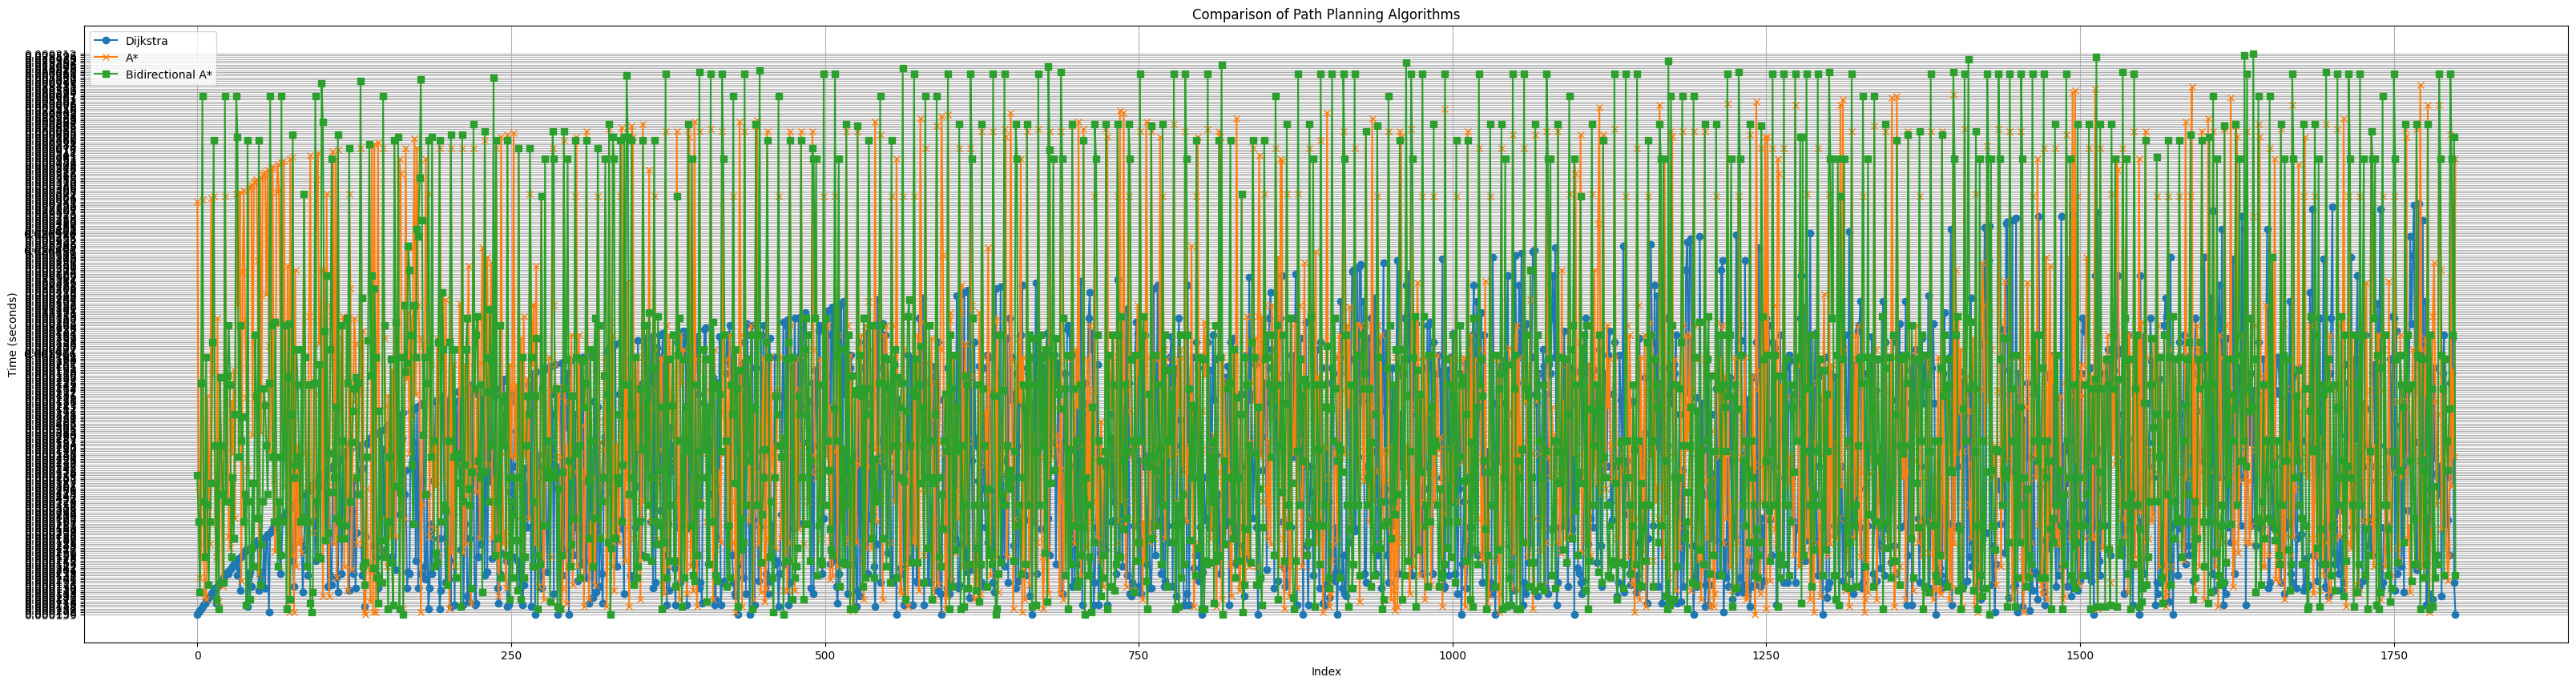

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = pd.DataFrame({
    "Dijkstra": Pruned_data_dijkstra,
    "A*": Pruned_data_a_star,
    "Bidirectional A*": Pruned_data_bidirectional_a_star
})

plt.figure(figsize=(40, 10))

# Plot each algorithm's data
plt.plot(data.index, data["Dijkstra"], label="Dijkstra", marker='o')
plt.plot(data.index, data["A*"], label="A*", marker='x')
plt.plot(data.index, data["Bidirectional A*"], label="Bidirectional A*", marker='s')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Path Planning Algorithms')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [42]:
for i in range(0, 1800):
    Pruned_data_dijkstra[i] = float(Pruned_data_dijkstra[i])
    Pruned_data_a_star[i] = float(Pruned_data_a_star[i])
    Pruned_data_bidirectional_a_star[i] = float(Pruned_data_bidirectional_a_star[i])

# Calculate the average time taken for each algorithm
average_dijkstra = sum(Pruned_data_dijkstra) / len(Pruned_data_dijkstra)
average_a_star = sum(Pruned_data_a_star) / len(Pruned_data_a_star)
average_bidirectional_a_star = sum(Pruned_data_bidirectional_a_star) / len(Pruned_data_bidirectional_a_star)

print("Average time taken for Dijkstra: ", average_dijkstra)
print("Average time taken for A*: ", average_a_star)
print("Average time taken for Bidirectional A*: ", average_bidirectional_a_star)




Average time taken for Dijkstra:  0.0003080083333333337
Average time taken for A*:  0.0003031794444444441
Average time taken for Bidirectional A*:  0.0002946438888888886


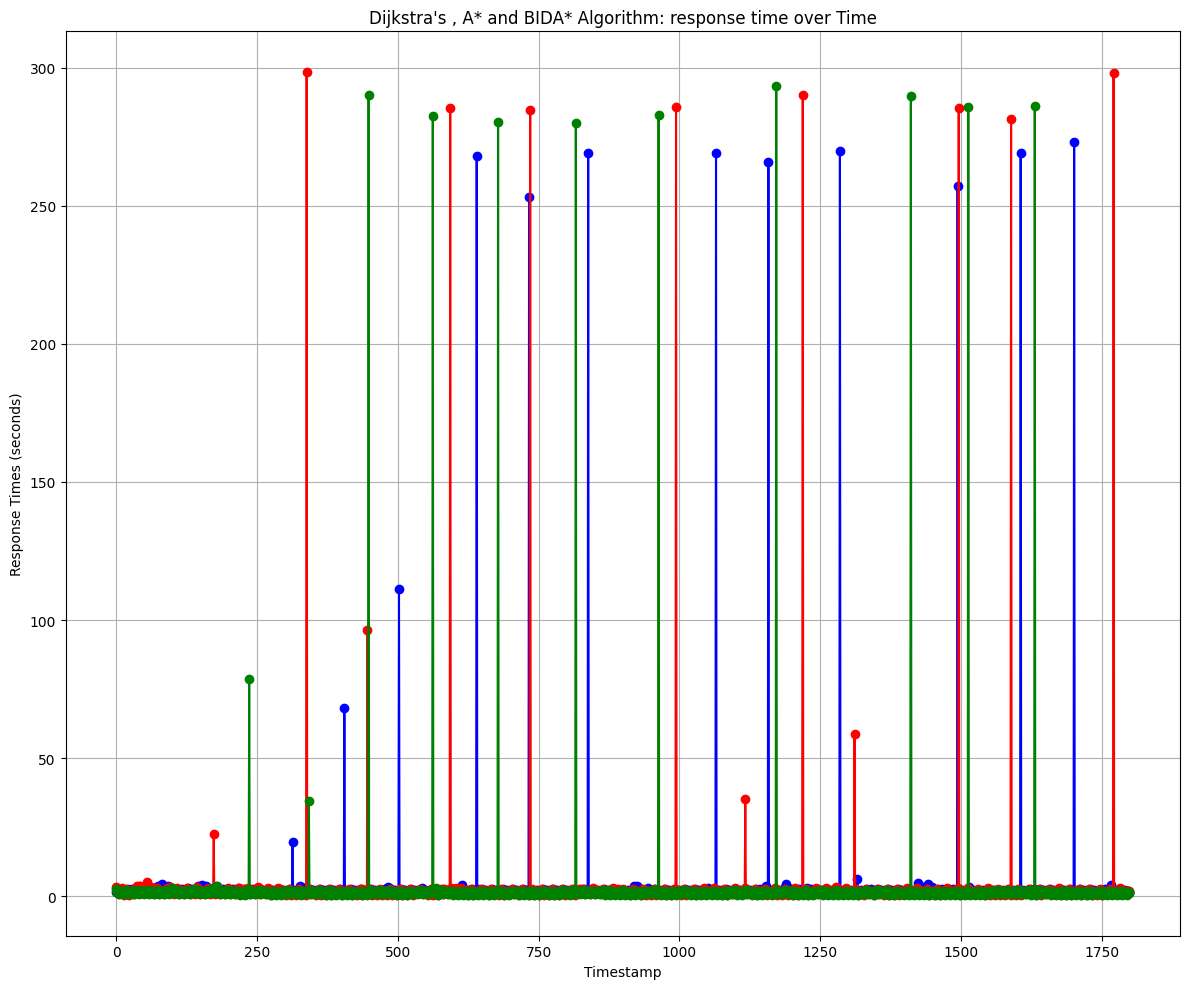

In [43]:
import matplotlib.pyplot as plt

# Convert strings to integers and divide by 1 million to convert microseconds to seconds
lengths_dijkstra = [float(x) * 10000 for x in Pruned_data_dijkstra]
lengths_a_star = [float(x) * 10000 for x in Pruned_data_a_star]
lengths_bidirectional_a_star = [float(x) * 10000 for x in Pruned_data_bidirectional_a_star]

# Create timestamps (assuming each data point represents a consecutive timestamp)
timestamps_dijkstra = list(range(len(Pruned_data_a_star)))


# Create the plot
plt.figure(figsize=(12, 10))
plt.plot(timestamps_dijkstra, lengths_dijkstra, marker='o', linestyle='-', color='b')
plt.plot(timestamps_dijkstra, lengths_a_star, marker='o', linestyle='-', color='r')
plt.plot(timestamps_dijkstra, lengths_bidirectional_a_star, marker='o', linestyle='-', color='g')



# Customize the plot
plt.title("Dijkstra's , A* and BIDA* Algorithm: response time over Time")
plt.xlabel("Timestamp")
plt.ylabel("Response Times (seconds)")
plt.grid(True)

# # Add text labels for each point
# for i, txt in enumerate(lengths_dijkstra):
#     plt.annotate(txt, (timestamps_dijkstra[i], lengths_dijkstra[i]), textcoords="offset points", xytext=(0,5), ha='center')


# Show the plot
plt.tight_layout()
plt.show()

In [56]:
print(lengths_a_star)

[0.0426, 0.030600000000000002, 0.0278, 0.0178, 0.018000000000000002, 0.0427, 0.0315, 0.0299, 0.0308, 0.0448, 0.0234, 0.0299, 0.025300000000000003, 0.0137, 0.0356, 0.0379, 0.0353, 0.0358, 0.029599999999999998, 0.030899999999999997, 0.0332, 0.018699999999999998, 0.0144, 0.0343, 0.043199999999999995, 0.045399999999999996, 0.0352, 0.0358, 0.0294, 0.0239, 0.0263, 0.0186, 0.0368, 0.037, 0.0366, 0.0312, 0.029599999999999998, 0.030600000000000002, 0.0372, 0.026699999999999998, 0.0196, 0.0379, 0.0294, 0.0429, 0.034699999999999995]


In [44]:
# calculating the path lengths

# read the file
file = open("/home/neo/Robotics/ros2_ws/Logs/logdijkstra.txt", "r")
lines = file.readlines()
file.close()
#process the files and put the results in a list 
Path_data_dijkstra = []
for line in lines:
    # check for the line with Path Lengths: 19 and get the path length
    if "Path Lengths:" in line:
        time = line.split(":")[1].strip()
        Path_data_dijkstra.append(time)

# read the file
file = open("/home/neo/Robotics/ros2_ws/Logs/logastar.txt", "r")
lines = file.readlines()
file.close()

Path_data_a_star = []
for line in lines:
    # check for line with "Time taken to plan the path: 0.000219" and get the time taken
    if "Path Lengths:" in line:
        time = line.split(":")[1].strip()
        Path_data_a_star.append(time)


# read the file for bidirectional a star
file = open("/home/neo/Robotics/ros2_ws/Logs/logbidias.txt", "r")
lines = file.readlines()
file.close()

Path_data_bidirectional_a_star = []
for line in lines:
    # check for line with "Time taken to plan the path: 0.000219" and get the time taken
    if "Path Lengths:" in line:
        time = line.split(":")[1].strip()
        Path_data_bidirectional_a_star.append(time)

In [46]:
# prune the results 
print("Dijkstra")
print(len(Path_data_dijkstra))
print("A*")
print(len(Path_data_a_star))
print("Bidirectional A*")
print(len(Path_data_bidirectional_a_star))

Path_Pruned_data_dijkstra = []
Path_Pruned_data_a_star = []
Path_Pruned_data_bidirectional_a_star = []

for i in range(0, 1800):
    Path_Pruned_data_dijkstra.append(Path_data_dijkstra[i])
    Path_Pruned_data_a_star.append(Path_data_a_star[i])
    Path_Pruned_data_bidirectional_a_star.append(Path_data_bidirectional_a_star[i])

Dijkstra
0
A*
0
Bidirectional A*
0


IndexError: list index out of range

In [40]:
print(Path_Pruned_data_dijkstra)

['19', '30', '24', '18', '11', '18', '20', '28', '22', '19', '32', '24', '18', '11', '18', '20', '28', '22', '19', '22', '24', '20', '11', '18', '20', '24', '22', '19', '28', '24', '24', '11', '20', '20', '24', '22', '19', '20', '16', '20', '11', '18', '20', '24', '22']


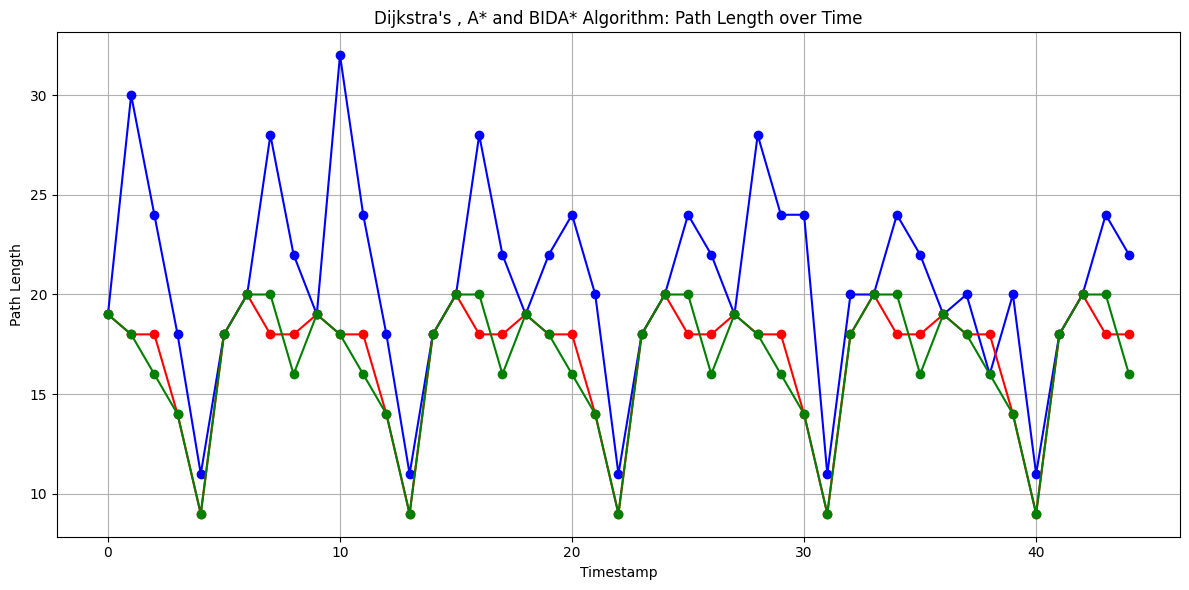

In [46]:
import matplotlib.pyplot as plt

# Convert strings to integers
path_lengths_dijkstra = [int(x) for x in Path_Pruned_data_dijkstra]
path_lengths_a_star = [int(x) for x in Path_Pruned_data_a_star]
path_lengths_bidirectional_a_star = [int(x) for x in Path_Pruned_data_bidirectional_a_star]

# Create timestamps (assuming each data point represents a consecutive timestamp)
timestamps_dijkstra = list(range(len(path_lengths_dijkstra)))


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(timestamps_dijkstra, path_lengths_dijkstra, marker='o', linestyle='-', color='b')
plt.plot(timestamps_dijkstra, path_lengths_a_star, marker='o', linestyle='-', color='r')
plt.plot(timestamps_dijkstra, path_lengths_bidirectional_a_star, marker='o', linestyle='-', color='g')



# Customize the plot
plt.title("Dijkstra's , A* and BIDA* Algorithm: Path Length over Time")
plt.xlabel("Timestamp")
plt.ylabel("Path Length")
plt.grid(True)

# # Add text labels for each point
# for i, txt in enumerate(path_lengths_dijkstra):
#     plt.annotate(txt, (timestamps_dijkstra[i], path_lengths_dijkstra[i]), textcoords="offset points", xytext=(0,5), ha='center')


# Show the plot
plt.tight_layout()
plt.show()

In [59]:
Path_average_a_star = sum(path_lengths_dijkstra) / len(path_lengths_dijkstra)
Path_average_dijkstra = sum(path_lengths_a_star) / len(path_lengths_a_star)
Path_average_bidirectional_a_star = sum(path_lengths_bidirectional_a_star) / len(path_lengths_bidirectional_a_star)

print("Average path length for Dijkstra: ", Path_average_dijkstra)
print("Average path length for A*: ", Path_average_a_star)
print("Average path length for Bidirectional A*: ", Path_average_bidirectional_a_star)

Average path length for Dijkstra:  16.88888888888889
Average path length for A*:  20.533333333333335
Average path length for Bidirectional A*:  16.666666666666668
